# GA Practice - Q1
We combined two datasets in single CSV file. Use the below script to separate the data.

Use data_clust for dimensionality reduction and clustering

Use data_recom for recommendation system.

import pandas as pd

data = pd.read_csv('dataset.csv')

data_clust = data.iloc[0:897,0:15]

data_recom = data.iloc[:,15:]

The column 'M3' talks about the relay position, which is the target column. Don't use this while doing clustering and dimensionality reduction.

### SECTION A (5 marks)
#### 1. Data Preprocessing 

    a. Read the dataset and perform required cleaning and preprocessing prior to model building. Justify the pre-processing approaches used. (2 Marks)
    
    b. Perform at least one univariate and bivariate analysis for the data_clust (2 Marks)
    
    c. Keep the input features of data_clust (independent variables) in the variable "inp_data_dime: and output feature (M3) in the variable out. (1 Mark)
    
### SECTION B (10 marks)
#### Answer the following questions 

2. Apply K means clustering and identify the ideal value of K using elbow and silhouette method.
### SECTION C (10 marks)
#### Answer the following questions 

3. Apply PCA on the data. How many PCs are required to reproduce the 95% characteristics of original data. What is the top 5 features contributing in PC1? (5 marks)

4. Build the following ML model and compare its performance: (5 Marks)

    a. ML model with original inp_data_dime and out
    
    b. ML model with inp_data_dime_pca and out
    
(Note: the PCA components (inp_data_dime_pca) must capture the 95 percent variance in the data)

### SECTION D (15 marks)
#### 5. Recommendation Systems 

    a. Build the popularity-based recommendation system and suggest top 5 items.(5 Marks) 
                              
    b. Build collaborative recommendation engine to recommend a top product/item to the specific user. Measure the model quality in terms of RMSE.(10 Marks)


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage , dendrogram, fcluster,cophenet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from surprise import KNNWithMeans,SVDpp
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split,cross_validate
import warnings
warnings.filterwarnings("ignore")

## SECTION A 
### 1. Data Preprocessing

### a. Read the dataset and perform required cleaning and preprocessing prior to model building. Justify the pre-processing approaches used.

In [54]:
# Load the dataset
data = pd.read_csv("C:\Datasets\dataset.csv")
data.head()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,M3,userId,productId,Rating
0,0.0001,0.0001,0.000100,0.000100,10.533904,0.020000,0.0001,0.0010,0.000100,0.000055,0.020028,0.004033,0.000120,0.020175,STOP,A2CX7LUOHB2NDG,321732944,5
1,0.0001,0.0001,0.649088,10.533804,10.533904,0.200000,0.0001,0.0001,0.000009,3.686851,2.043426,2.252111,2.755849,6.642700,RAISE,A2NWSAGRHCP8N5,439886341,1
2,0.0201,0.0011,1.034308,9.884816,10.533904,0.012324,0.4001,0.3001,0.061619,3.463706,1.744177,2.080688,3.011271,6.487301,RAISE,A2WNBOD3WNDNKT,439886341,3
3,0.0401,0.0021,1.751681,9.499596,10.533904,0.020927,0.8001,0.6001,0.098188,3.332879,1.687366,2.003913,3.651600,7.005406,RAISE,A1GI0U4ZRJA8WN,439886341,1
4,0.0391,0.0031,1.967625,8.782223,10.533904,0.036879,1.2001,0.9001,0.166290,3.081598,1.577678,1.856335,3.724070,6.842547,RAISE,A1QGNMC6O1VW39,511189877,5


In [55]:
data.shape

(2000, 18)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N1         897 non-null    float64
 1   N2         897 non-null    float64
 2   N3         897 non-null    float64
 3   N4         897 non-null    float64
 4   N5         897 non-null    float64
 5   N6         897 non-null    float64
 6   N7         897 non-null    float64
 7   N8         897 non-null    float64
 8   N9         897 non-null    float64
 9   N10        897 non-null    float64
 10  N11        897 non-null    float64
 11  N12        897 non-null    float64
 12  N13        897 non-null    float64
 13  N14        897 non-null    float64
 14  M3         897 non-null    object 
 15  userId     2000 non-null   object 
 16  productId  2000 non-null   object 
 17  Rating     2000 non-null   int64  
dtypes: float64(14), int64(1), object(3)
memory usage: 281.4+ KB


In [57]:
data_clust = data.iloc[0:897,0:15]
data_recom = data.iloc[:,15:]

In [58]:
data_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N1      897 non-null    float64
 1   N2      897 non-null    float64
 2   N3      897 non-null    float64
 3   N4      897 non-null    float64
 4   N5      897 non-null    float64
 5   N6      897 non-null    float64
 6   N7      897 non-null    float64
 7   N8      897 non-null    float64
 8   N9      897 non-null    float64
 9   N10     897 non-null    float64
 10  N11     897 non-null    float64
 11  N12     897 non-null    float64
 12  N13     897 non-null    float64
 13  N14     897 non-null    float64
 14  M3      897 non-null    object 
dtypes: float64(14), object(1)
memory usage: 105.2+ KB


In [61]:
data_clust.isnull().sum().sum()

0

No missing values in data_clust

In [62]:
data_recom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     2000 non-null   object
 1   productId  2000 non-null   object
 2   Rating     2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [63]:
data_recom.isnull().sum().sum()

0

No missing values in data_recom

### b. Perform at least one univariate and bivariate analysis for the data_clust

Univariate Analysis
We'll look at the distribution of one of the features, say N1.

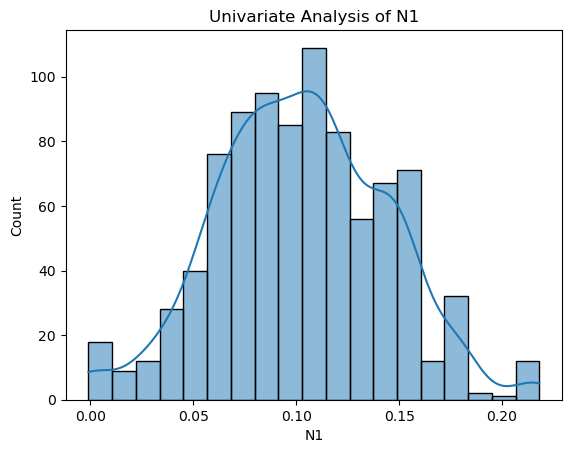

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis - Distribution plot for N1
sns.histplot(data_clust['N1'], kde=True)
plt.title(f'Univariate Analysis of N1')
plt.show()

Bivariate Analysis
We'll look at the relationship between two features, say N1 and N2.

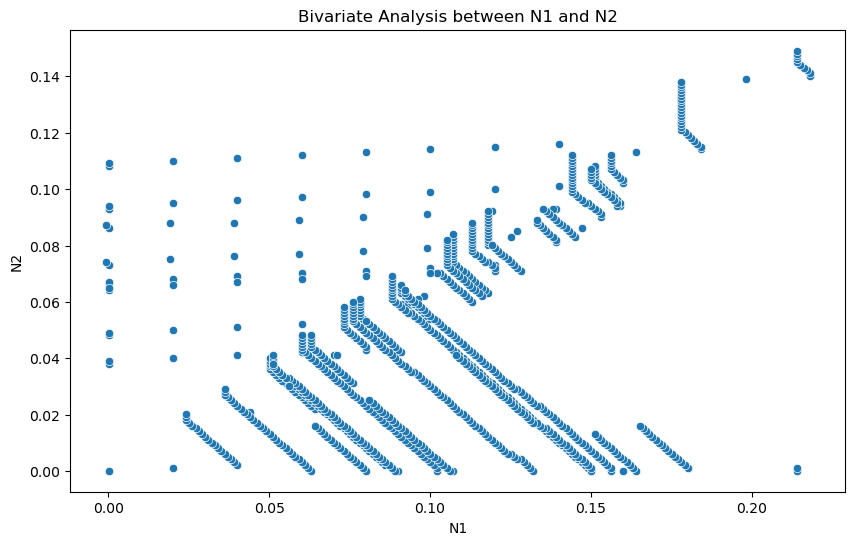

In [67]:
# Bivariate analysis - Scatter plot between N1 and N2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='N1', y='N2', data=data_clust)
plt.title('Bivariate Analysis between N1 and N2')
plt.show()

### c. Keep the input features of data_clust (independent variables) in the variable inp_data_dime and output feature (M3) in the variable out.

In [68]:
# Separate input and output features for data_clust

# Input features
inp_data_dime = data_clust.drop(columns=['M3'])

# Output feature
out = data_clust['M3']

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(inp_data_dime)
scaled_data=pd.DataFrame(scaled_data,columns=inp_data_dime.columns)
scaled_data

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14
0,-2.473613,-1.318140,-2.525802,-1.432362,0.0,-0.099540,-1.219368,-1.219272,-2.513870,-1.454856,-0.219083,-0.763659,-3.274864,-1.569459
1,-2.473613,-1.318140,-2.281730,2.524661,0.0,-0.068158,-1.219368,-1.219369,-2.514227,2.503527,0.135991,1.087882,-2.068152,-0.464287
2,-1.990776,-1.290001,-2.136856,2.280867,0.0,-0.100878,-1.187224,-1.187225,-2.271015,2.263944,0.083478,0.946697,-1.956305,-0.490220
3,-1.507938,-1.261861,-1.867065,2.136157,0.0,-0.099378,-1.155081,-1.155082,-2.126651,2.123479,0.073509,0.883464,-1.675910,-0.403758
4,-1.532080,-1.233721,-1.785853,1.866674,0.0,-0.096597,-1.122937,-1.122938,-1.857812,1.853688,0.054260,0.761917,-1.644176,-0.430936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,2.692747,2.818388,1.272528,-1.031933,0.0,0.095566,2.766412,2.766417,1.033867,-1.008337,0.013785,-0.373809,1.241092,0.407727
893,2.692747,2.846528,1.634627,-1.269348,0.0,0.227329,2.798555,2.798561,1.270715,-1.245833,0.126999,-0.358630,1.607354,0.636516
894,2.692747,2.874667,-0.789684,-1.631036,0.0,0.785699,2.830699,2.830704,1.631538,-1.607645,0.659442,0.002387,-1.299725,0.006848
895,2.692747,-1.318140,-0.470791,0.790518,0.0,-0.407452,2.862842,2.862847,-0.784228,0.814741,-0.343527,-0.009965,-0.363870,-0.402038


## SECTION B
### 2. Apply K-means clustering and identify the ideal value of K using elbow and silhouette method

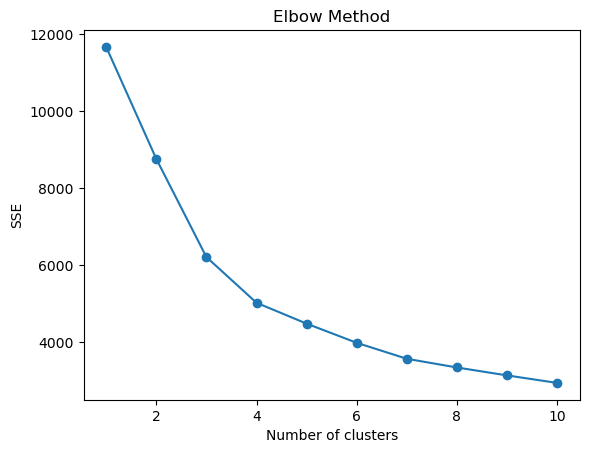

In [71]:
# Elbow Method
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i,n_init=10)
    km.fit_predict(scaled_data)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()    

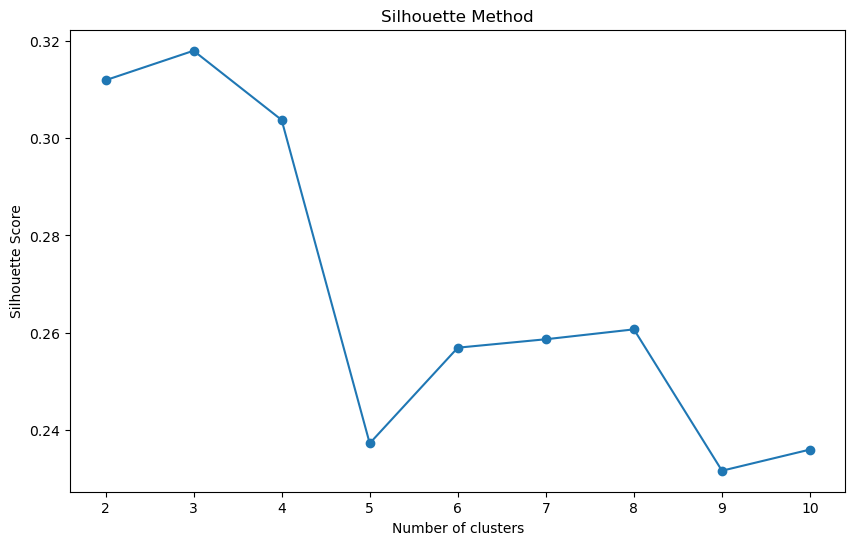

In [72]:
# Silhouette Method
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
    
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

## SECTION C
### 3. Apply PCA on the data. How many PCs are required to reproduce the 95% characteristics of the original data? What are the top 5 features contributing to PC1?

In [73]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
inp_data_dime_pca = pca.fit_transform(inp_data_dime)

# Number of components to capture 95% variance
num_components = pca.n_components_
print(f"Number of components to capture 95% variance: {num_components}")

Number of components to capture 95% variance: 3


In [38]:
# Get the loadings for the first principal component
pc1_loadings = pca.components_[0]

# Get the top 5 features contributing to PC1
top_5_features = np.argsort(np.abs(pc1_loadings))[-5:]

# Feature names
feature_names = inp_data_dime.columns

print("Top 5 features contributing to PC1:")
for i in top_5_features:
    print(f"{feature_names[i]}: {pc1_loadings[i]}")

Top 5 features contributing to PC1:
N14: -0.010424062237583142
N6: -0.01246985149607769
N11: -0.012897379412945395
N8: 0.5998580257800485
N7: 0.7998119231685523


### 4. Build the following ML model and compare its performance (5 marks)
    a. ML model with original inp_data_dime and out
    b. ML model with inp_data_dime_pca and out
(Note: the PCA components (inp_data_dime_pca) must capture the 95 percent variance in the data)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inp_data_dime, out, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(inp_data_dime_pca, out, test_size=0.3, random_state=42)

In [75]:
# Model with original data
model_original = LogisticRegression(max_iter=1000)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print("Performance with original data:")
print(f"Accuracy: {accuracy_original}")
print(classification_report(y_test, y_pred_original))

Performance with original data:
Accuracy: 0.9481481481481482
              precision    recall  f1-score   support

        HOLD       0.17      0.20      0.18         5
       LOWER       0.00      0.00      0.00         1
       RAISE       0.97      0.98      0.98       259
        STOP       0.00      0.00      0.00         5

    accuracy                           0.95       270
   macro avg       0.28      0.30      0.29       270
weighted avg       0.93      0.95      0.94       270



In [76]:
# Model with PCA data
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)

print("\nPerformance with PCA data:")
print(f"Accuracy: {accuracy_pca}")
print(classification_report(y_test_pca, y_pred_pca))


Performance with PCA data:
Accuracy: 0.9592592592592593
              precision    recall  f1-score   support

        HOLD       0.00      0.00      0.00         5
       LOWER       0.00      0.00      0.00         1
       RAISE       0.96      1.00      0.98       259
        STOP       0.00      0.00      0.00         5

    accuracy                           0.96       270
   macro avg       0.24      0.25      0.24       270
weighted avg       0.92      0.96      0.94       270



## SECTION D
### 5. Recommendation Systems

### a. Popularity-based Recommendation System

In [80]:
import pandas as pd

data_recom.columns = ['user_id', 'item_id', 'rating']

# Calculate the average rating and the count of ratings for each item
item_popularity = data_recom.groupby('item_id').agg({'rating': ['mean', 'count']})
item_popularity.columns = ['Average_rating', 'Rating_count']

# Sort items by rating count and mean rating
top_items = item_popularity.sort_values(by=['Rating_count', 'Average_rating'], ascending=False).head(5)

print("Top 5 popular items:\n")
top_items

Top 5 popular items:



,Average_rating,Rating_count
item_id,,
972683275,4.470980,1051
1400501466,3.560000,250
1400532620,3.654545,165
1400501776,3.884892,139
1400501520,4.243902,82


### b. Collaborative Filtering Recommendation System

In [87]:
data_recom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  2000 non-null   object
 1   item_id  2000 non-null   object
 2   rating   2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [90]:
# Load the data into Surprise's Dataset
reader = Reader(rating_scale=(data_recom['rating'].min(), data_recom['rating'].max()))
rating_data = Dataset.load_from_df(data_recom[['user_id', 'item_id', 'rating']], reader)

In [93]:
# Split the data into training and testing sets
trainset, testset = train_test_split(rating_data, test_size=0.2)

### (i) Build a user-based collaborative filtering model

In [114]:
from surprise import Dataset, Reader, KNNBasic

sim_options = {'name': 'cosine', 'user_based': True}
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [115]:
predictions = model.test(testset)

In [116]:
# Evaluate RMSE
rmse = accuracy.rmse(predictions)

RMSE: 1.2782


In [117]:
# Function to recommend top N items for a specific user
def get_top_n_recommendations(algo, user_id, n=1):
    # Get a list of all item ids
    all_items = data_recom['item_id'].unique()
    # Get a list of items already rated by the user
    rated_items = data_recom[data_recom['user_id'] == user_id]['item_id']
    # Get a list of items not yet rated by the user
    items_to_recommend = [item for item in all_items if item not in rated_items]
    
    # Predict the rating for each item not yet rated
    predictions = [algo.predict(user_id, item_id) for item_id in items_to_recommend]
    
    # Sort the predictions by estimated rating
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Return the top N items
    top_n_items = predictions[:n]
    return top_n_items

In [118]:
# Example usage
user_id = data_recom['user_id'].iloc[1]  # Replace with a specific user id
top_recommendations = get_top_n_recommendations(model, user_id, n=5)

print(f"Top recommendation for user {user_id}:")
for recommendation in top_recommendations:
    print(f"Item {recommendation.iid} with predicted rating {recommendation.est}")

Top recommendation for user A2NWSAGRHCP8N5:
Item 321732944 with predicted rating 4.138125
Item 439886341 with predicted rating 4.138125
Item 511189877 with predicted rating 4.138125
Item 528881469 with predicted rating 4.138125
Item 558835155 with predicted rating 4.138125


### (ii) Using SVD for collaborative filtering

In [103]:
from surprise import Dataset, Reader, SVD

model = SVD(n_factors=50, n_epochs=200)
model.fit(trainset)

In [105]:
predictions = model.test(testset)

In [106]:
rmse = accuracy.rmse(predictions)

RMSE: 1.2213


In [110]:
# Function to recommend top N items for a specific user
def get_top_n_recommendations(algo, user_id, n=1):
    # Get a list of all item ids
    all_items = data_recom['item_id'].unique()
    # Get a list of items already rated by the user
    rated_items = data_recom[data_recom['user_id'] == user_id]['item_id']
    # Get a list of items not yet rated by the user
    items_to_recommend = [item for item in all_items if item not in rated_items]
    
    # Predict the rating for each item not yet rated
    predictions = [algo.predict(user_id, item_id) for item_id in items_to_recommend]
    
    # Sort the predictions by estimated rating
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Return the top N items
    top_n_items = predictions[:n]
    return top_n_items

In [113]:
# Example usage
user_id = data_recom['user_id'].iloc[0]  # Replace with a specific user id
top_recommendations = get_top_n_recommendations(model, user_id, n=5)

print(f"Top recommendation for user {user_id}:")
for recommendation in top_recommendations:
    print(f"Item {recommendation.iid} with predicted rating {recommendation.est}")

Top recommendation for user A2CX7LUOHB2NDG:
Item 1182702627 with predicted rating 4.967485003039911
Item 321732944 with predicted rating 4.964517585909436
Item 1400501474 with predicted rating 4.868564438476388
Item 594296420 with predicted rating 4.816495854825081
Item 1400501520 with predicted rating 4.781265327874505
